In [1]:
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

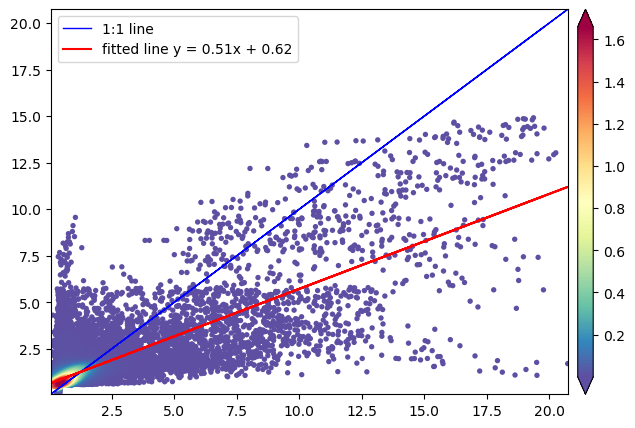

In [5]:
# Read data
df = pd.read_csv(r'../phase_0_predictions.csv')
x = df['fluors']
y = df['y_pred']

# linear regression of y on x (scipy)

import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# plot linear regression

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots(figsize=(7,5),dpi=100)
maxNum = max(x)
minNum = min(x)
ax.plot(x, x, color='blue', linewidth=1,label = '1:1 line')#reference line
ax.plot(x, intercept + slope*x, 'r', label='fitted line y = {:.2f}x + {:.2f}'.format(slope,intercept))
ax.legend()
plt.xlim(minNum, maxNum)
plt.ylim(minNum, maxNum)
#Least squares fit

xcord = x
ycord = y

m = ((xcord*ycord).mean() - xcord.mean()* ycord.mean())/(pow(xcord,2).mean()-pow(xcord.mean(),2))

c = ycord.mean() - m*xcord.mean()
# Plot
y1=m*x+c  
scatter=ax.scatter(x,y,marker='o',c=z,edgecolors='none',s=15,label='LST',cmap='Spectral_r')
divider=make_axes_locatable(ax)
cax = divider.append_axes("right",size="3%",pad=0.1)
cbar = fig.colorbar(scatter, cax=cax, label='frequency')
cbar = fig.colorbar(scatter,cax=cax,extend='both',aspect=30,fraction=.03,pad=0.01)

# plt.savefig('plot82.1.png',dpi=800,bbox_inches='tight',pad_inches=0)
plt.show()

In [2]:
tempBuoy = pd.read_csv(r'../Cefas_smartbuoy/clean_data.csv')
tempBuoy.index = pd.to_datetime(tempBuoy['dateTime'])
tempBuoy = tempBuoy.drop(columns=['dateTime'])

# drop all columns except for temperature
tempBuoy = tempBuoy.drop(columns=['sal','ftu','fluors','o2','kd','par_0','par_1','par_2'])
tempBuoy

# resample to hourly data

tempBuoy = tempBuoy.resample('H').mean()
tempBuoy.dropna(inplace=True)
tempBuoy

,temp,phase
dateTime,,
2002-08-28 13:00:00,18.766667,0.0
2002-08-28 14:00:00,18.742500,0.0
2002-08-28 15:00:00,18.755000,0.0
2002-08-28 16:00:00,18.840000,0.0
2002-08-28 17:00:00,18.907500,0.0
...,...,...
2019-08-04 09:00:00,18.951000,4.0
2019-08-04 10:00:00,19.019000,4.0
2019-08-04 11:00:00,19.007500,4.0


In [3]:
ERA5 = pd.read_csv(r'../OpenData/CMEMS_SST_SSS.csv')
ERA5.index = pd.to_datetime(ERA5['Unnamed: 0'])
ERA5

ERA5.drop(columns=['Unnamed: 0'],inplace=True)
ERA5.index = pd.to_datetime(ERA5.index)
ERA5

# find the overlap data between the buoy and ERA5

overlap = pd.concat([tempBuoy,ERA5],axis=1,join='inner')
overlap.dropna(inplace=True)

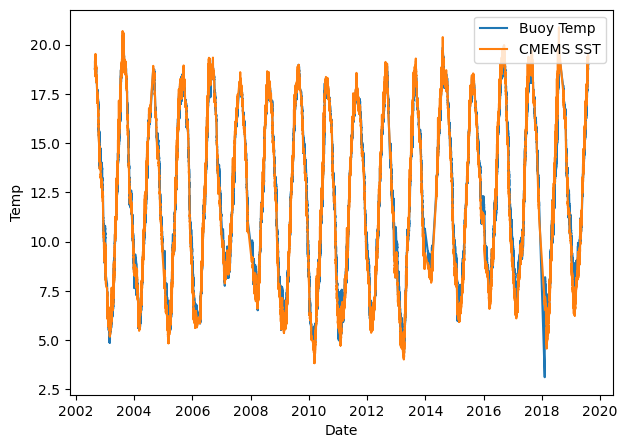

In [4]:
# plot temp	CMEMS_SST in the same plot

fig, ax = plt.subplots(figsize=(7,5),dpi=100)
ax.plot(overlap.index,overlap['temp'],label='Buoy Temp')
ax.plot(overlap.index,overlap['CMEMS_SST'],label='CMEMS SST')
ax.legend(loc = 'upper right')
ax.set_xlabel('Date')
ax.set_ylabel('Temp')
plt.show()




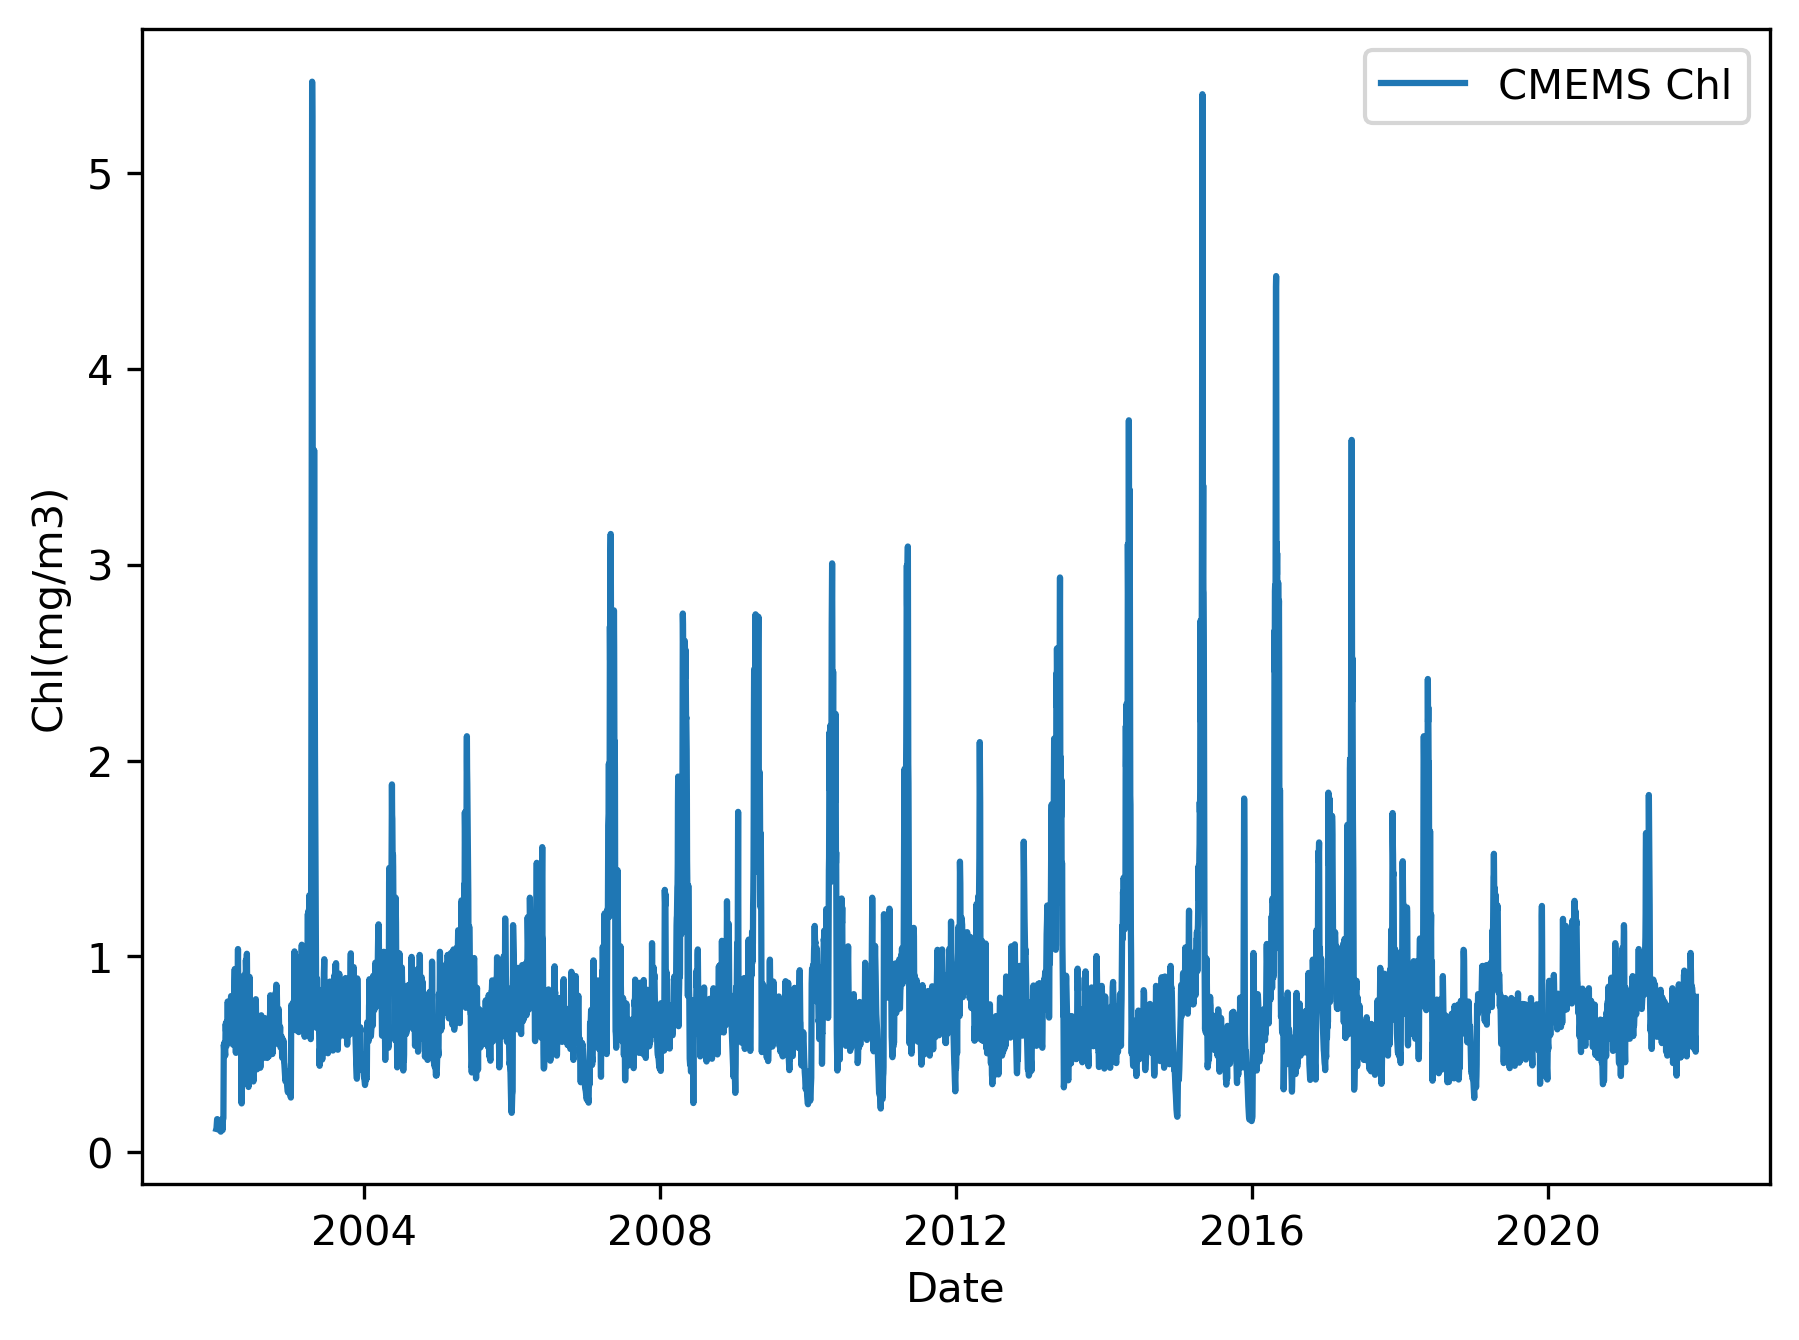

In [14]:
Chl_O2 = pd.read_csv(r'../OpenData/CMEMS_Chl_O2.csv')
Chl_O2.index = pd.to_datetime(Chl_O2['Unnamed: 0'])
Chl_O2

Chl_O2.drop(columns=['Unnamed: 0'],inplace=True)
Chl_O2.index = pd.to_datetime(Chl_O2.index)
# change index name
Chl_O2.index.name = 'dateTime'

Chl_O2.columns = ['CMEMS_Chl','CMEMS_O2']

# plot CMEMS_Chl

fig, ax = plt.subplots(figsize=(7,5),dpi=300)
ax.plot(Chl_O2.index,Chl_O2['CMEMS_Chl'],label='CMEMS Chl')
ax.legend(loc = 'upper right')
ax.set_xlabel('Date')
ax.set_ylabel('Chl(mg/m3)')
plt.show()

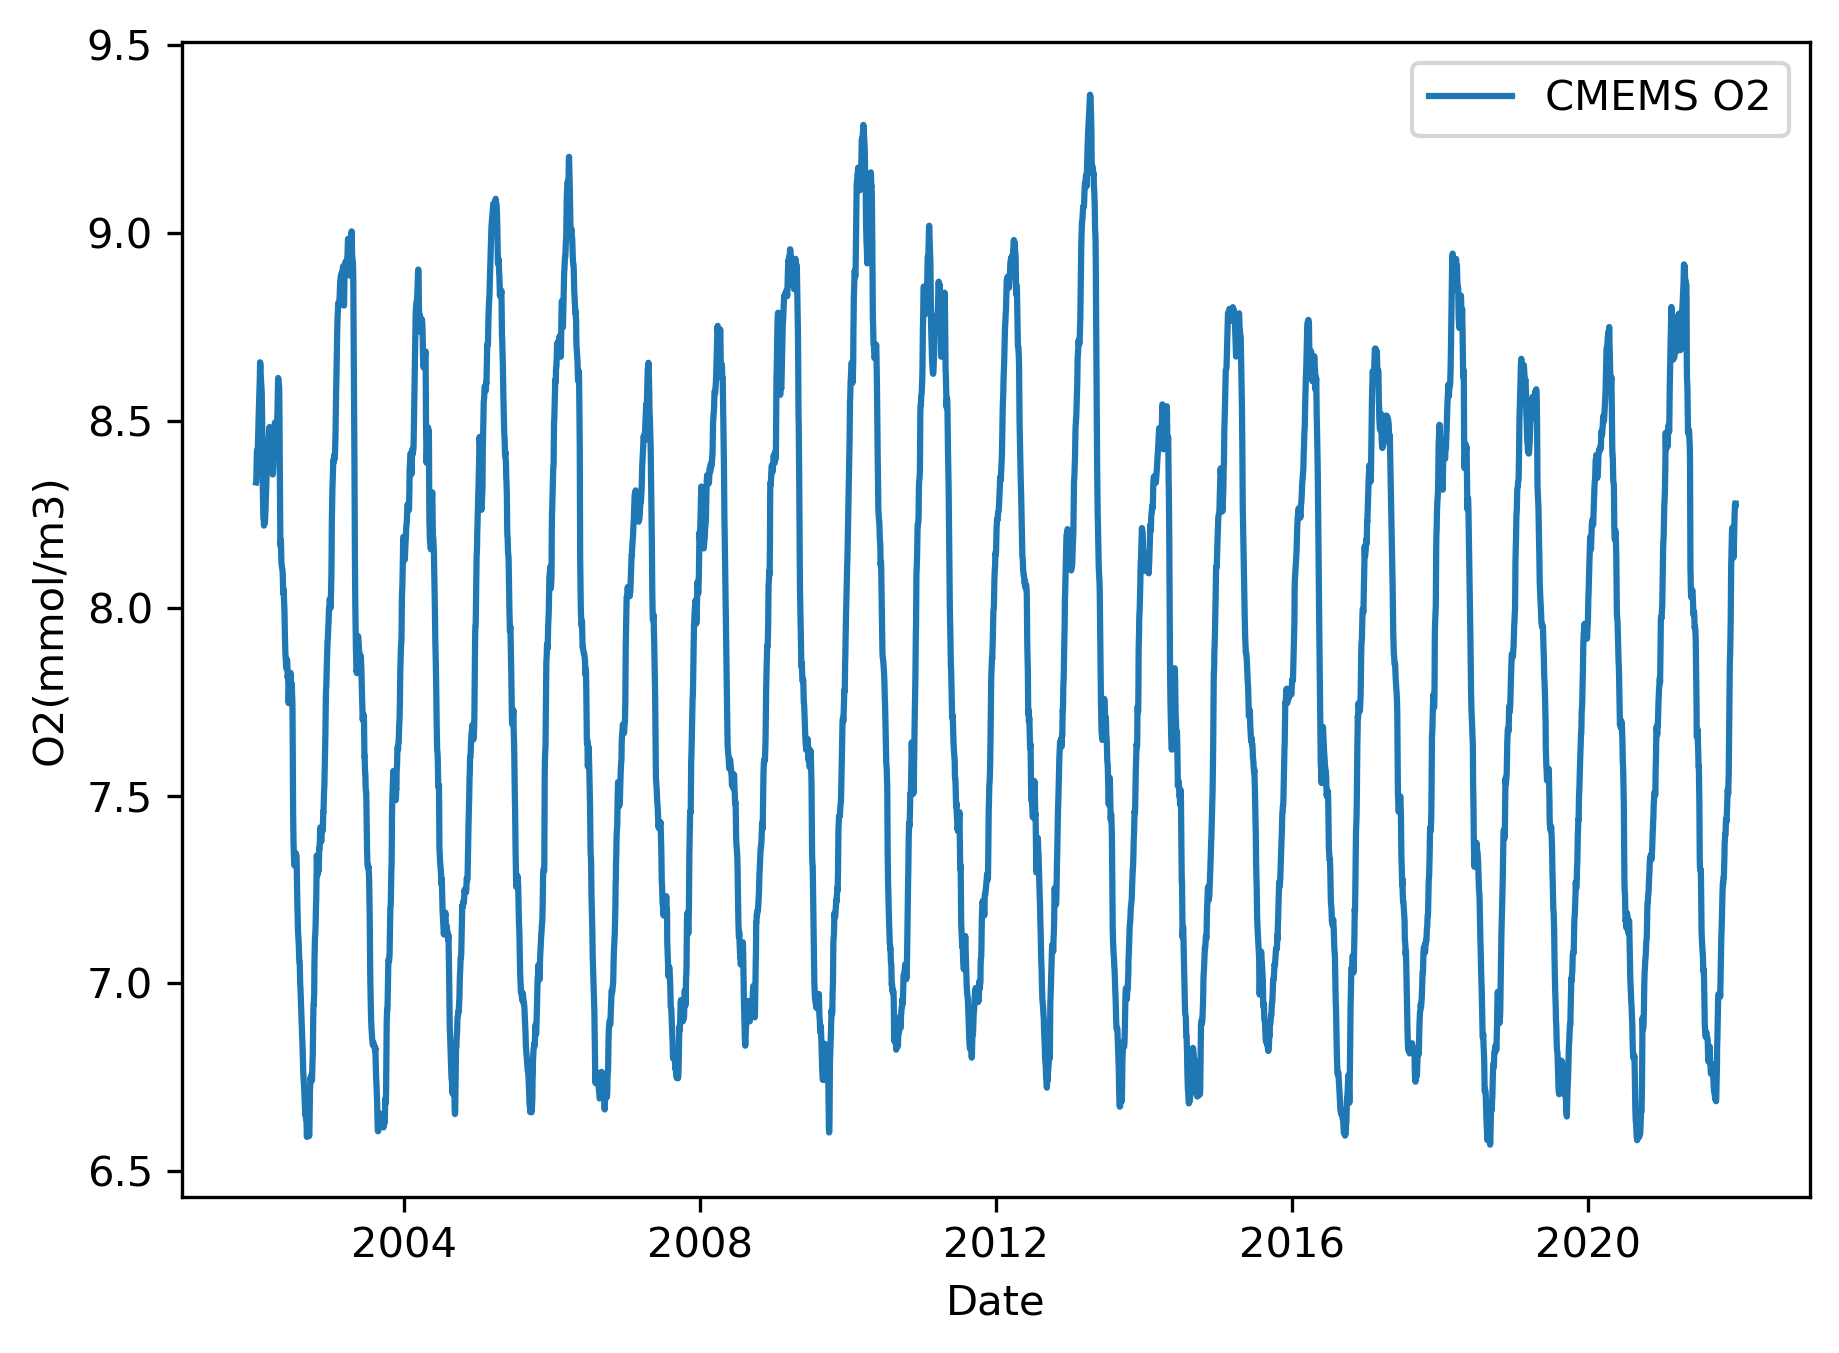

In [15]:
fig, ax = plt.subplots(figsize=(7,5),dpi=300)
ax.plot(Chl_O2.index,Chl_O2['CMEMS_O2'],label='CMEMS O2')
ax.legend(loc = 'upper right')
ax.set_xlabel('Date')
ax.set_ylabel('O2(mmol/m3)')
plt.show()

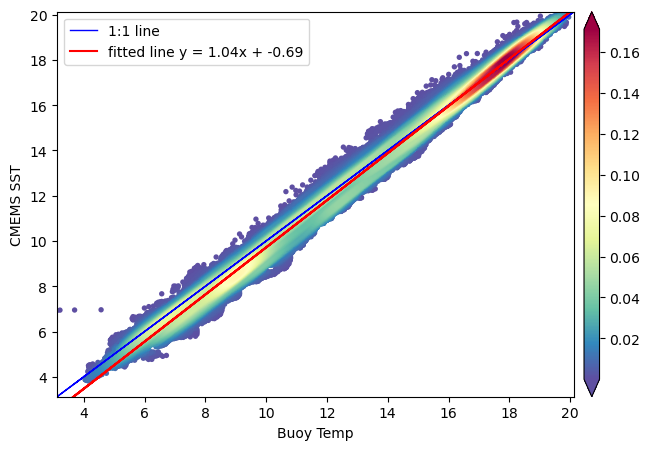

In [8]:
# Read data
df = pd.read_csv(r'../phase_0_predictions.csv')
x = overlap['temp']
y = overlap['CMEMS_SST']

# linear regression of y on x (scipy)

import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# plot linear regression

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots(figsize=(7,5),dpi=100)
maxNum = max(x)
minNum = min(x)
ax.plot(x, x, color='blue', linewidth=1,label = '1:1 line')#reference line
ax.plot(x, intercept + slope*x, 'r', label='fitted line y = {:.2f}x + {:.2f}'.format(slope,intercept))
ax.legend()
ax.set_xlabel('Buoy Temp')
ax.set_ylabel('CMEMS SST')
plt.xlim(minNum, maxNum)
plt.ylim(minNum, maxNum)
#Least squares fit

xcord = x
ycord = y

m = ((xcord*ycord).mean() - xcord.mean()* ycord.mean())/(pow(xcord,2).mean()-pow(xcord.mean(),2))

c = ycord.mean() - m*xcord.mean()
# Plot
y1=m*x+c  
scatter=ax.scatter(x,y,marker='o',c=z,edgecolors='none',s=15,label='LST',cmap='Spectral_r')
divider=make_axes_locatable(ax)
cax = divider.append_axes("right",size="3%",pad=0.1)
cbar = fig.colorbar(scatter, cax=cax, label='frequency')
cbar = fig.colorbar(scatter,cax=cax,extend='both',aspect=30,fraction=.03,pad=0.01)

# plt.savefig('plot82.1.png',dpi=800,bbox_inches='tight',pad_inches=0)
plt.show()